In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
from trajectory import *


In [2]:
def avg_distance(paths, nodes):
    total = []
    for i in nodes:
        for j in nodes:
            if i != j:
                t = find_common_times(paths[i].t, paths[j].t)
                total.append(AVG_DIS(paths[i].pos_func(t), paths[j].pos_func(t)))
    return np.mean(total)

In [4]:
nodes = [3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-2-sync/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
# paths2, _ = read_paths("/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-2/swarm2", nodes, t0=t0)
# paths[2] = paths2[2]
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, True)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.15))
# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))


Avg distance 0.68m


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
3,49.4m,0.060,0.685,9.4e-04,1.3e-03,4.2e-04,5.65e-04
4,47.4m,0.076,0.799,5.6e-04,6.2e-04,1.5e-04,6.79e-04
Avg.,48.4,0.068,0.74,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
4->3,"0.026,0.020,0.012",0.035,0.14°,"0.004,+0.004,+0.004",+0.01°
Avg:,,0.035,0.14°,,


VINS-Mono


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
3,45.3m,0.179,4.468,1.5e-02,7.3e-03,3.2e-03,5.01e-04
4,43.5m,0.295,7.952,1.4e-02,1.0e-02,1.5e-02,1.53e-03
Avg.,44.4,0.237,6.21,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
4->3,"0.127,0.175,0.165",0.272,0.52°,"-0.018,-0.160,+0.094",+0.04°
Avg:,,0.272,0.52°,,


In [24]:
nodes = [3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-2-async/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
align_paths(paths, paths_gt, True)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=False, outlier_thres=0.15))

Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
3by1,48.6m,0.106,4.558,1.2e-03,1.9e-03,4.1e-03,8.88e-04
4by1,46.8m,0.104,4.382,1.3e-03,1.2e-03,3.9e-03,1.81e-04
Avg.,47.7,0.105,4.47,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->4,"0.026,0.019,0.057",0.065,0.15°,"0.007,-0.005,-0.004",+0.00°
Avg:,,0.065,0.15°,,


In [5]:
nodes = [1, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-3-sync/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.15))
# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


Avg distance 0.70m


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,49.0m,0.053,0.555,1.2e-03,1.2e-03,4.4e-04,5.46e-04
3,48.7m,0.057,0.728,8.1e-04,6.1e-04,3.9e-04,4.34e-04
4,46.5m,0.063,0.611,2.6e-03,2.9e-03,6.1e-04,1.64e-04
Avg.,48.1,0.058,0.63,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->1,"0.028,0.022,0.015",0.038,0.18°,"-0.005,-0.001,-0.005",+0.01°
4->1,"0.022,0.019,0.012",0.031,0.13°,"-0.003,+0.002,-0.001",-0.01°
4->3,"0.022,0.017,0.013",0.031,0.17°,"0.002,+0.003,+0.004",-0.02°
Avg:,,0.033,0.16°,,


VINS-Mono


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,45.9m,0.317,3.524,1.6e-02,9.3e-03,9.7e-03,1.39e-03
3,45.3m,0.179,4.469,1.5e-02,7.3e-03,3.2e-03,5.01e-04
4,43.4m,0.295,7.952,1.4e-02,1.0e-02,1.5e-02,1.53e-03
Avg.,44.9,0.263,5.31,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->1,"0.186,0.095,0.131",0.247,0.77°,"0.117,-0.037,-0.105",-0.56°
4->1,"0.170,0.219,0.101",0.295,0.71°,"0.097,-0.203,-0.011",-0.53°
4->3,"0.127,0.175,0.165",0.272,0.52°,"-0.018,-0.160,+0.094",+0.04°
Avg:,,0.271,0.66°,,


In [6]:
nodes = [1, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-3-async/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.15))

Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,49.1m,0.055,1.144,3.5e-04,1.4e-03,5.1e-04,4.12e-04
3,48.8m,0.050,1.245,1.3e-03,8.4e-04,4.2e-04,7.13e-04
4,46.6m,0.073,1.232,1.5e-03,3.8e-04,2.9e-04,4.05e-04
Avg.,48.2,0.059,1.21,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
3->1,"0.029,0.023,0.019",0.042,0.16°,"-0.004,+0.000,-0.003",-0.01°
4->1,"0.021,0.019,0.015",0.032,0.13°,"-0.003,+0.004,-0.000",-0.01°
4->3,"0.024,0.019,0.017",0.036,0.15°,"0.000,+0.004,+0.003",+0.00°
Avg:,,0.037,0.14°,,


In [7]:
nodes = [1, 2, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-4-sync/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
# print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.2, outlier_yaw_thres=0.05))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,48.9m,0.061,0.505,1.1e-03,1.3e-03,3.1e-04,5.71e-04
2,54.9m,0.065,0.697,1.7e-03,1.0e-03,2.9e-04,9.66e-04
3,48.4m,0.055,0.691,4.2e-04,7.4e-04,1.8e-04,6.94e-04
4,46.4m,0.079,0.600,2.5e-02,3.7e-04,5.1e-04,4.82e-04
Avg.,49.7,0.065,0.62,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.035,0.029,0.019",0.049,0.15°,"-0.002,+0.003,+0.000",-0.01°
3->1,"0.029,0.021,0.015",0.039,0.16°,"-0.002,+0.001,-0.004",-0.01°
3->2,"0.039,0.030,0.021",0.054,0.18°,"-0.000,-0.003,-0.004",+0.01°
4->1,"0.025,0.019,0.013",0.034,0.13°,"-0.002,+0.004,-0.001",-0.01°
4->2,"0.036,0.028,0.017",0.049,0.15°,"-0.000,+0.001,-0.001",+0.00°
4->3,"0.024,0.018,0.014",0.033,0.15°,"-0.000,+0.003,+0.003",+0.00°
Avg:,,0.043,0.15°,,


VINS-Mono


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,45.9m,0.317,3.524,1.6e-02,9.3e-03,9.7e-03,1.39e-03
2,51.5m,0.257,2.859,2.4e-02,6.3e-03,1.5e-03,1.52e-03
3,45.3m,0.179,4.469,1.5e-02,7.3e-03,3.2e-03,5.01e-04
4,43.4m,0.295,7.952,1.4e-02,1.0e-02,1.5e-02,1.53e-03
Avg.,46.5,0.262,4.70,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.352,0.126,0.142",0.400,0.83°,"0.317,-0.052,-0.121",-0.70°
3->1,"0.186,0.095,0.131",0.247,0.77°,"0.117,-0.037,-0.105",-0.56°
3->2,"0.282,0.121,0.062",0.313,0.49°,"-0.202,+0.007,+0.016",+0.14°
4->1,"0.170,0.219,0.101",0.295,0.71°,"0.097,-0.203,-0.011",-0.53°
4->2,"0.284,0.180,0.145",0.366,0.36°,"-0.219,-0.139,+0.109",+0.17°
4->3,"0.127,0.175,0.165",0.272,0.52°,"-0.018,-0.160,+0.094",+0.04°
Avg:,,0.315,0.61°,,


In [8]:
nodes = [1, 2, 3, 4]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-4-async/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.2, outlier_yaw_thres=0.05))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,49.0m,0.048,0.705,8.7e-04,1.1e-03,4.6e-04,7.12e-04
2,54.2m,0.077,1.010,1.8e-03,6.5e-04,4.7e-04,9.47e-04
3,48.7m,0.055,0.857,8.5e-04,5.7e-04,2.0e-04,4.97e-03
4,46.6m,0.059,0.800,1.2e-03,7.3e-04,2.6e-04,6.27e-04
Avg.,49.6,0.060,0.84,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.036,0.033,0.023",0.055,0.20°,"-0.006,-0.002,-0.001",-0.01°
3->1,"0.031,0.028,0.017",0.045,0.28°,"-0.009,-0.004,-0.008",-0.07°
3->2,"0.032,0.031,0.025",0.051,0.26°,"-0.004,-0.002,-0.008",-0.06°
4->1,"0.033,0.025,0.014",0.044,0.22°,"-0.010,-0.001,-0.003",-0.06°
4->2,"0.034,0.031,0.021",0.050,0.21°,"-0.005,+0.001,-0.002",-0.04°
4->3,"0.026,0.023,0.015",0.037,0.26°,"-0.001,+0.002,+0.005",+0.01°
Avg:,,0.047,0.24°,,


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,49.2m,0.046,0.631,6.2e-04,9.3e-04,3.6e-04,4.38e-04
2,54.9m,0.091,1.052,1.5e-03,8.1e-04,2.4e-04,6.73e-04
3,48.6m,0.048,0.710,4.8e-04,9.5e-04,8.1e-05,3.14e-04
4,46.8m,0.080,0.797,8.0e-04,1.3e-03,8.2e-05,1.53e-04
5,36.3m,0.071,0.797,9.6e-03,1.4e-03,3.7e-04,2.28e-03
Avg.,47.2,0.067,0.80,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.034,0.029,0.016",0.047,0.18°,"-0.003,-0.005,+0.001",-0.02°
3->1,"0.030,0.023,0.012",0.040,0.16°,"-0.003,-0.002,-0.003",-0.02°
3->2,"0.037,0.030,0.015",0.050,0.19°,"-0.001,+0.002,-0.004",+0.00°
4->1,"0.024,0.020,0.010",0.033,0.13°,"-0.003,+0.001,+0.001",-0.02°
4->2,"0.033,0.028,0.014",0.046,0.18°,"-0.001,+0.005,+0.000",+0.01°
4->3,"0.025,0.018,0.010",0.032,0.14°,"0.000,+0.003,+0.004",+0.00°
5->1,"0.040,0.044,0.019",0.063,0.28°,"0.001,-0.015,-0.007",-0.11°
5->2,"0.037,0.039,0.017",0.056,0.30°,"0.004,-0.011,-0.007",-0.09°
5->3,"0.038,0.040,0.017",0.058,0.27°,"0.004,-0.013,-0.005",-0.08°
5->4,"0.039,0.042,0.019",0.061,0.27°,"0.004,-0.015,-0.008",-0.09°


VINS-Mono


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1,45.9m,0.317,3.524,1.6e-02,9.3e-03,9.7e-03,1.39e-03
2,51.5m,0.257,2.859,2.4e-02,6.3e-03,1.5e-03,1.52e-03
3,45.3m,0.179,4.469,1.5e-02,7.3e-03,3.2e-03,5.01e-04
4,43.4m,0.295,7.952,1.4e-02,1.0e-02,1.5e-02,1.53e-03
5,34.6m,0.363,2.260,7.8e-03,5.4e-03,1.1e-02,1.60e-03
Avg.,44.1,0.282,4.21,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
2->1,"0.352,0.126,0.142",0.400,0.83°,"0.317,-0.052,-0.121",-0.70°
3->1,"0.186,0.095,0.131",0.247,0.77°,"0.117,-0.037,-0.105",-0.56°
3->2,"0.282,0.121,0.062",0.313,0.49°,"-0.202,+0.007,+0.016",+0.14°
4->1,"0.170,0.219,0.101",0.295,0.71°,"0.097,-0.203,-0.011",-0.53°
4->2,"0.284,0.180,0.145",0.366,0.36°,"-0.219,-0.139,+0.109",+0.17°
4->3,"0.127,0.175,0.165",0.272,0.52°,"-0.018,-0.160,+0.094",+0.04°
5->1,"0.224,0.212,0.164",0.349,0.79°,"0.095,-0.149,+0.142",-0.46°
5->2,"0.272,0.146,0.268",0.409,0.62°,"-0.222,-0.097,+0.263",+0.24°
5->3,"0.181,0.172,0.253",0.356,0.40°,"-0.025,-0.108,+0.247",+0.10°
5->4,"0.190,0.154,0.190",0.309,0.60°,"-0.014,+0.052,+0.155",+0.07°


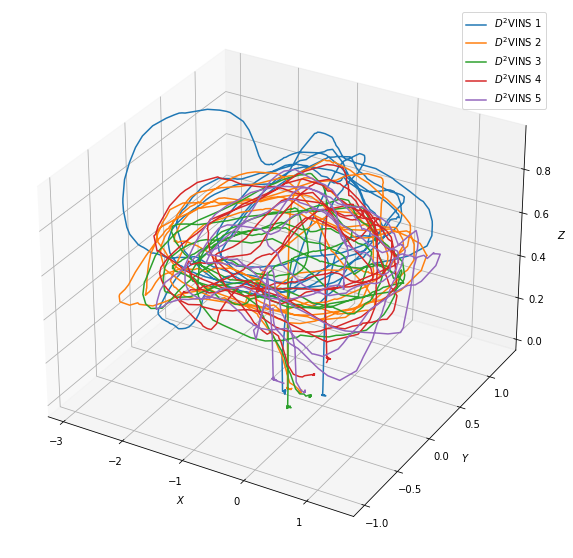

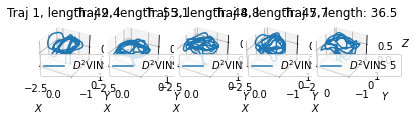

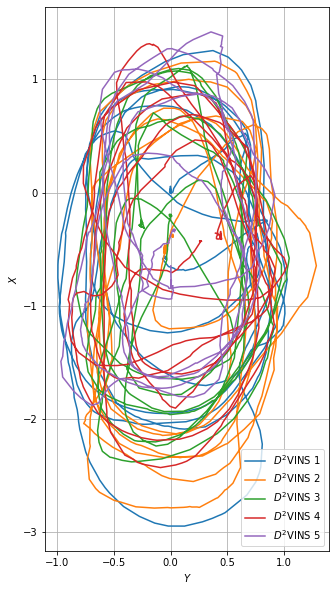

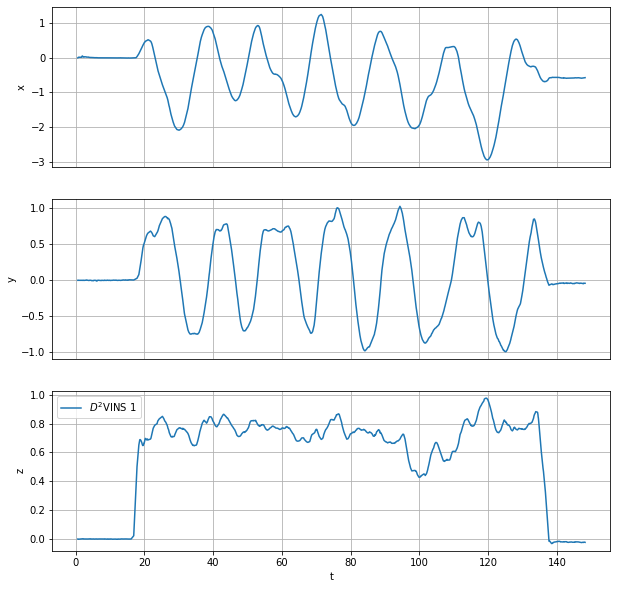

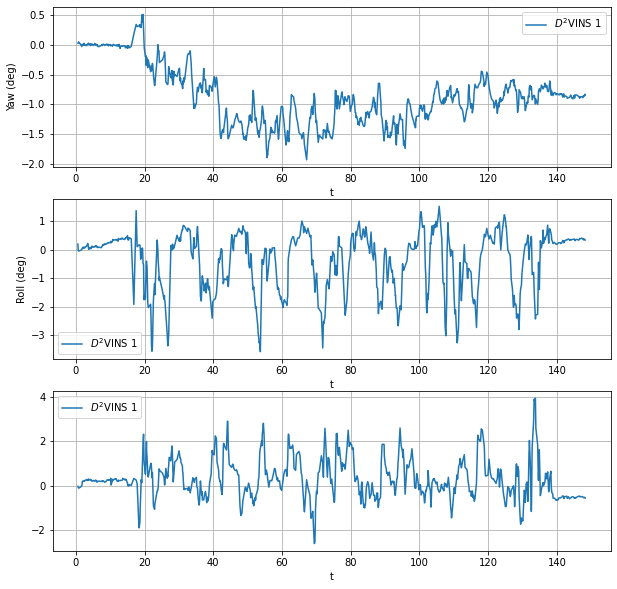

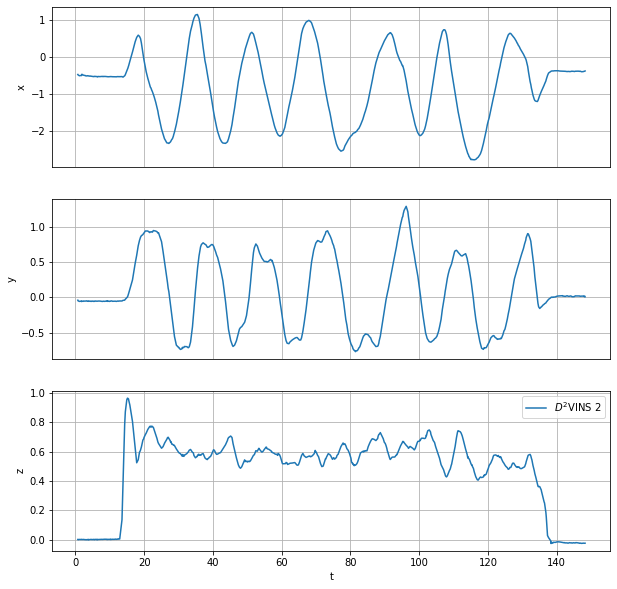

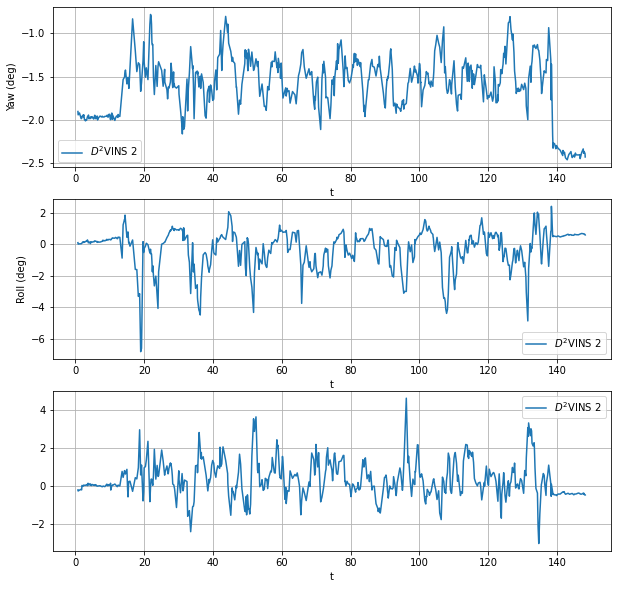

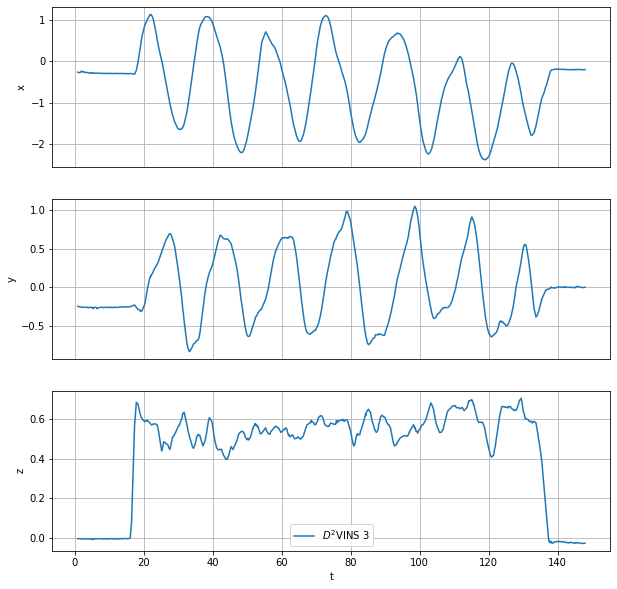

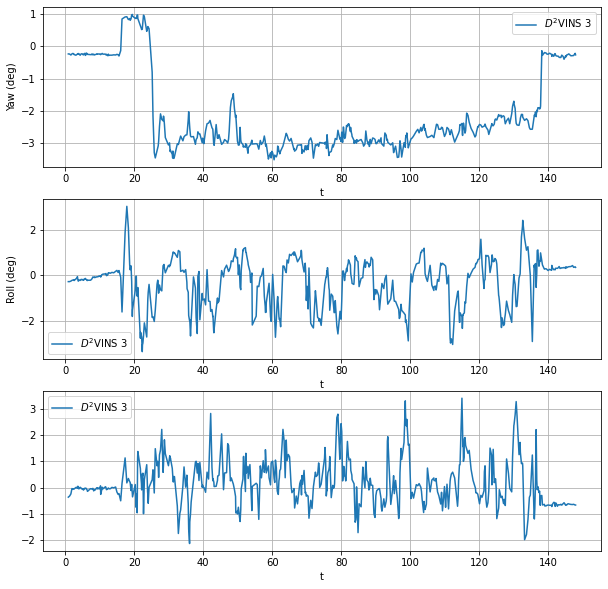

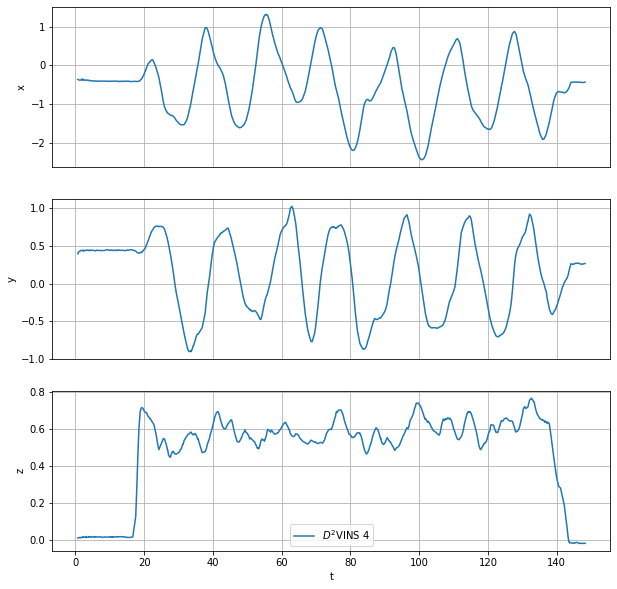

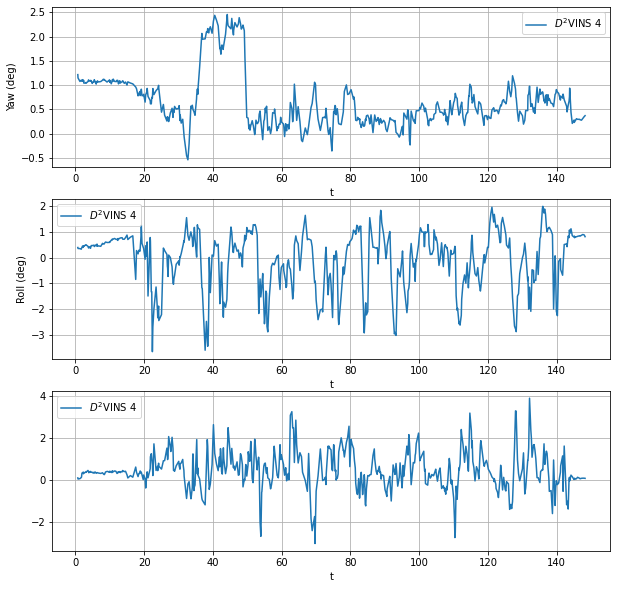

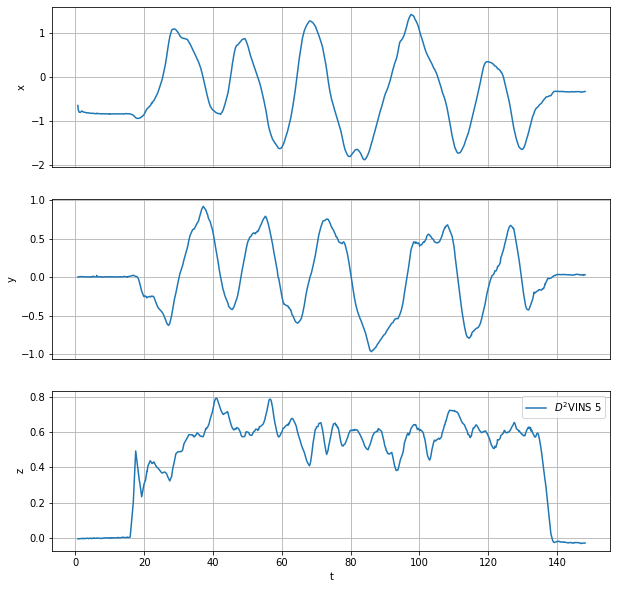

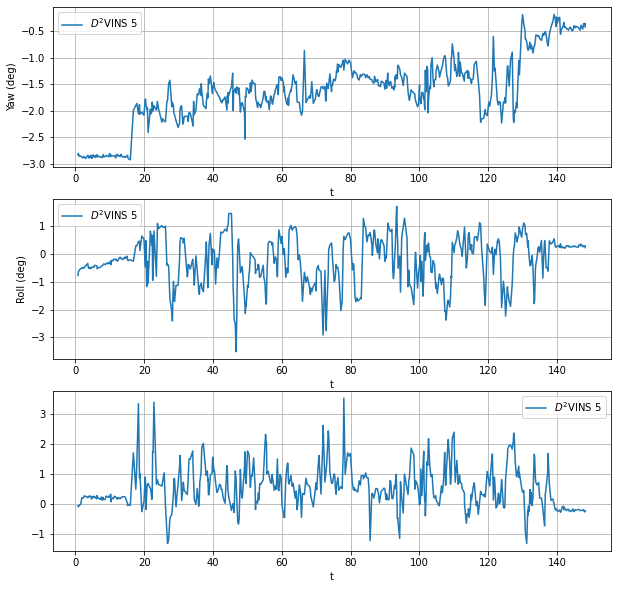

In [9]:
nodes = [1, 2, 3, 4, 5]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-5-sync/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
# print(f"Avg distance {avg_distance(paths_gt, nodes):.2f}m")
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths, paths_gt, dte=dte, outlier_thres=0.2, outlier_yaw_thres=0.05))
plot_fused(nodes, paths, poses_gt=None, figsize=(10,10))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(relative_pose_err(nodes, paths_vo, paths_gt, dte=dte))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,49.1m,0.043,1.131,2.4e-03,9.5e-04,2.0e-04,4.86e-04
2by1,54.8m,0.076,1.089,3.7e-04,7.2e-04,4.0e-04,3.41e-04
3by1,48.5m,0.054,1.039,5.8e-04,7.9e-04,2.6e-04,1.16e-03
4by1,46.5m,0.059,1.144,1.7e-03,7.2e-04,1.5e-04,4.23e-04
5by1,36.6m,0.071,0.925,1.3e-03,5.1e-04,2.9e-04,2.92e-03
Avg.,47.1,0.060,1.07,,,,


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.035,0.031,0.018",0.050,0.18°,"0.002,-0.003,-0.004",+0.02°
1->3,"0.033,0.024,0.014",0.043,0.18°,"0.008,-0.001,+0.002",+0.03°
1->4,"0.025,0.020,0.012",0.034,0.14°,"0.004,-0.003,-0.000",+0.01°
1->5,"0.044,0.044,0.027",0.068,0.30°,"-0.004,+0.004,+0.006",+0.08°
Avg:,,0.049,0.20°,,


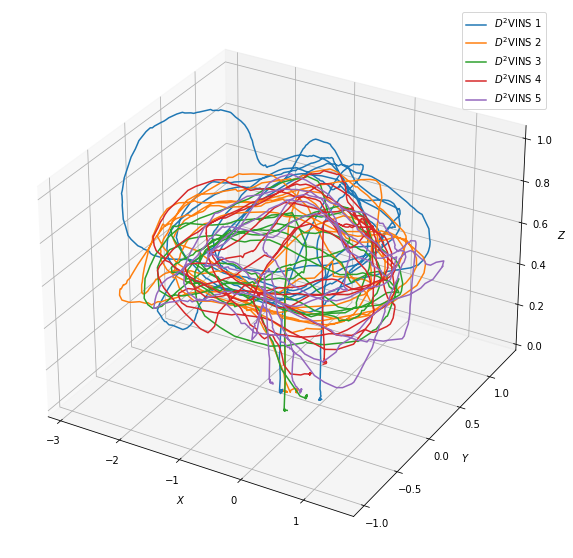

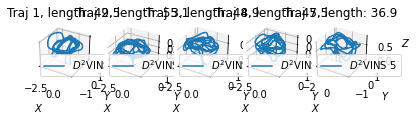

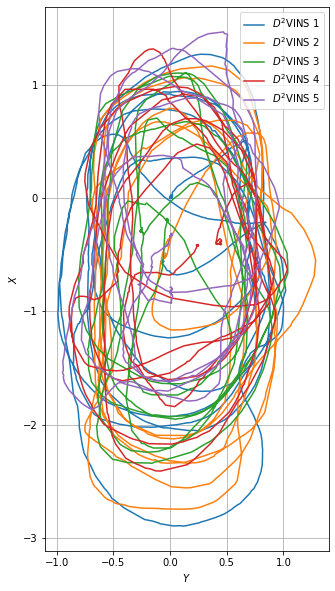

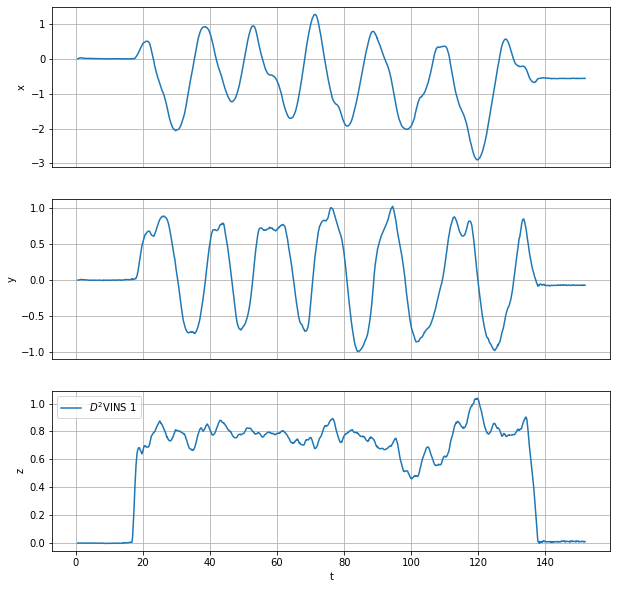

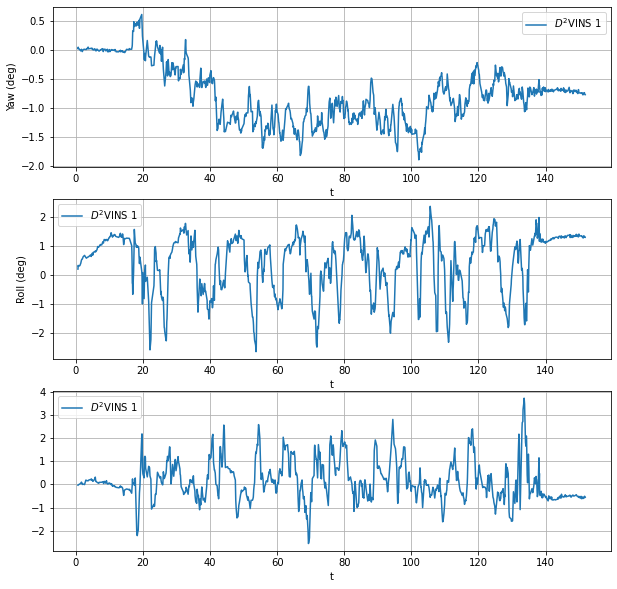

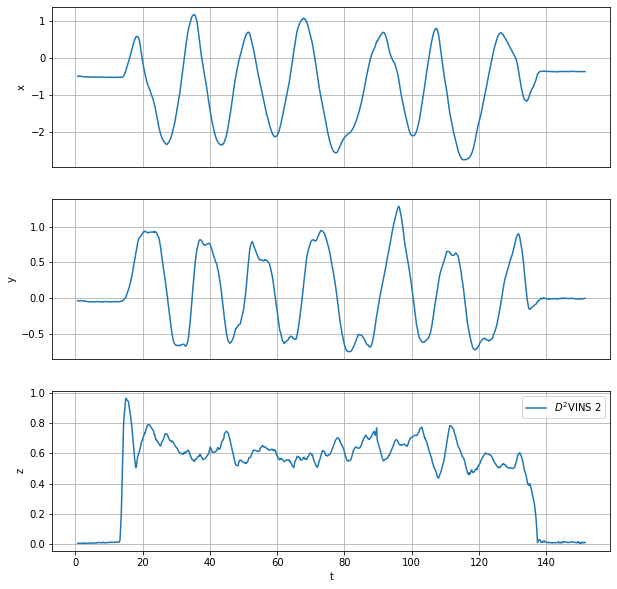

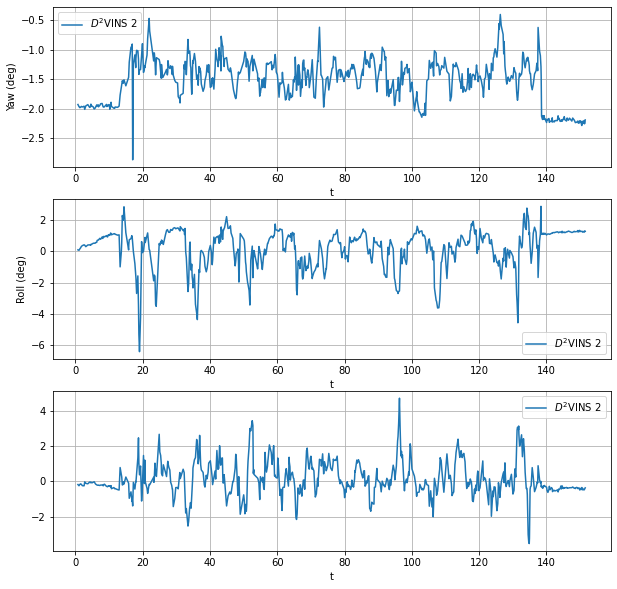

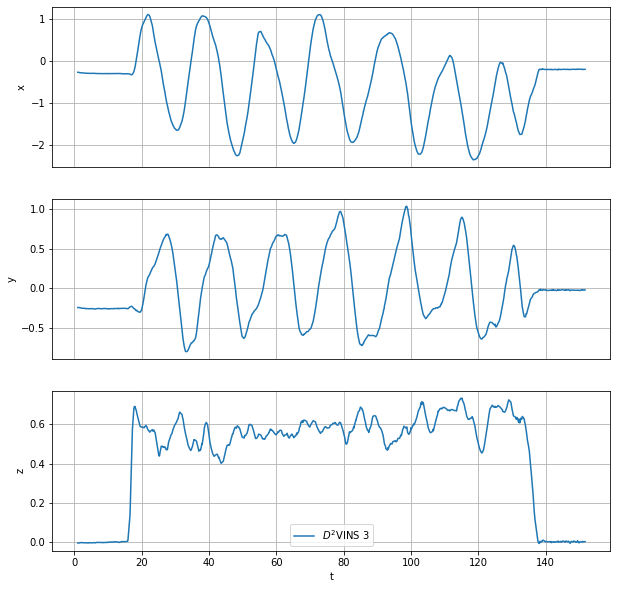

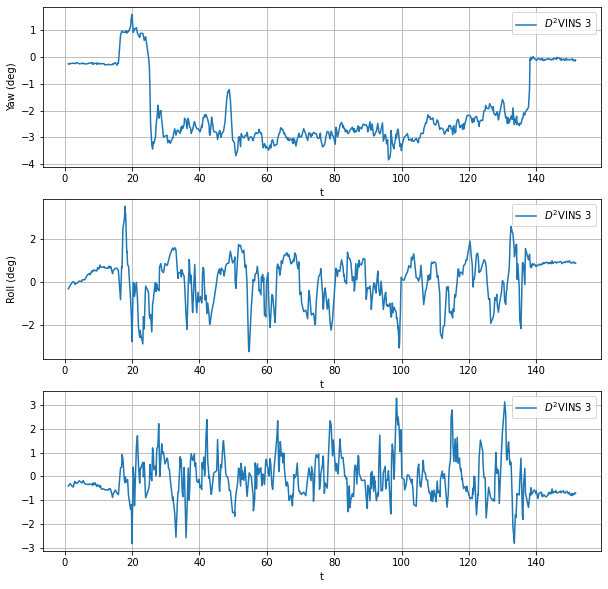

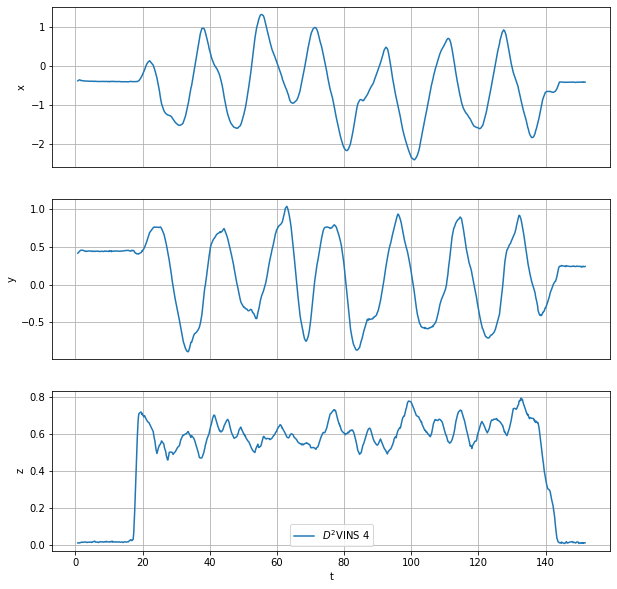

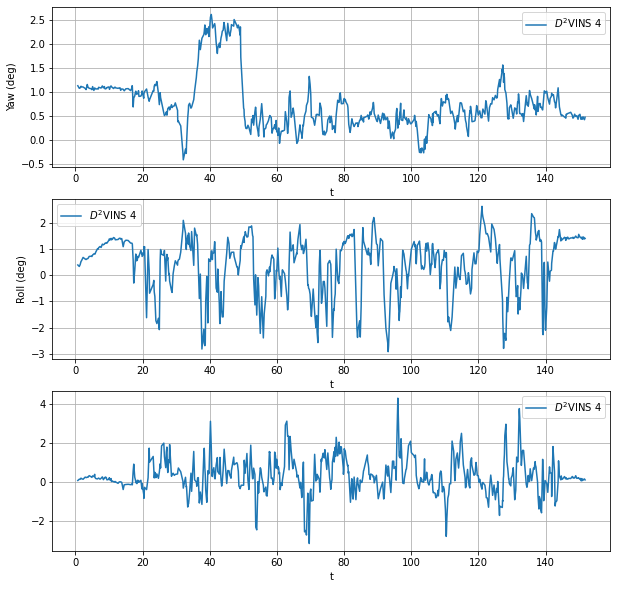

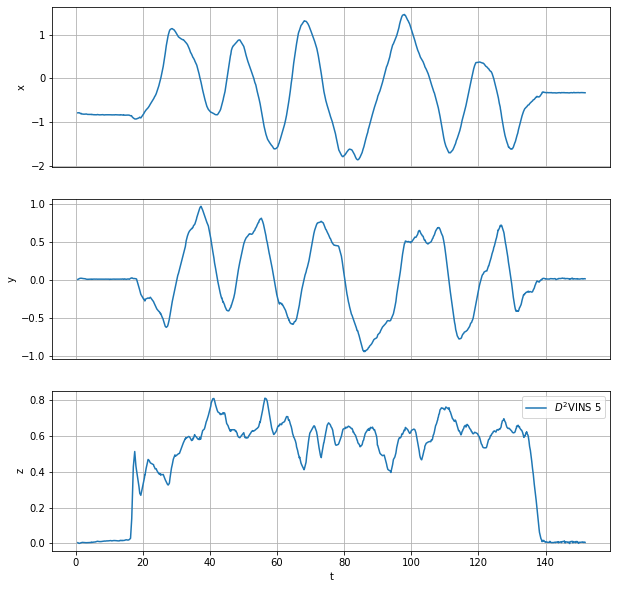

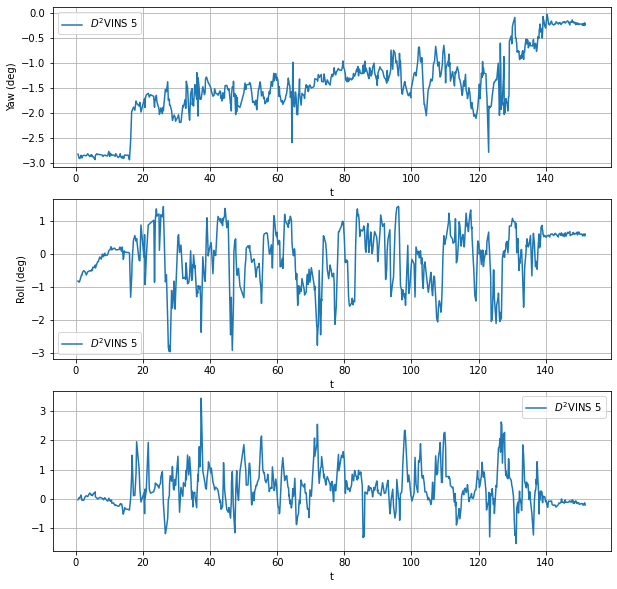

In [5]:
nodes = [1, 2, 3, 4, 5]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26//outputs/d2vins-5-async/swarm{nodes[0]}"
data_folder="/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/"
dte = 140
paths_gt, t0 = read_paths(data_folder, nodes, prefix="manual_small_", suffix="-groundtruth.txt")
paths, _ = read_paths(output_folder, nodes, t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths, paths_gt, dte=dte, show=False, outlier_thres=0.2, outlier_yaw_thres=0.05))
plot_fused(nodes, paths, poses_gt=None, figsize=(10,10))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m
1by1,100.6m,0.139,1.454,9.5e-04,1.4e-03,9.2e-05,1.16e-03
Avg.,100.6,0.139,1.45,,,,


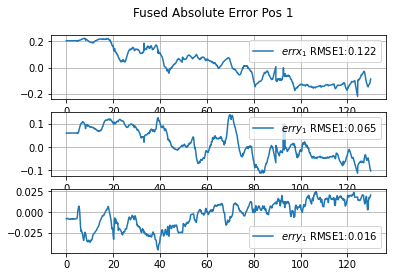

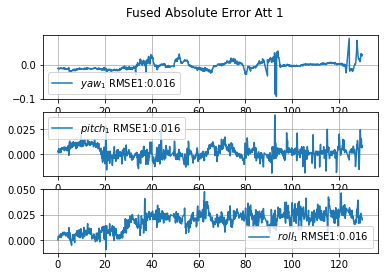

In [28]:
nodes = [1]
output_folder = f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/outputs/d2vins-calib/swarm{nodes[0]}"
dte = 130
paths_gt = {}
paths, t0 = read_paths(output_folder, nodes)
paths_gt[1], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/manual_vo_test-groundtruth.txt", t0)
align_path_by_minimize(paths[1], paths_gt[1])
display(plot_fused_err(nodes, paths, paths_gt, dte=dte, show=True, outlier_thres=0.25))

# print("VINS-Mono")
# paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono", t0=t0)
# align_paths(paths_vo, paths_gt)
# display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths_vo, poses_gt=paths_gt, figsize=(10,10))

In [82]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
for i in range(1, 7):
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/manual_quadcam_7inch_n3_2022_10_26/manual_small_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

for i in range(1, 7):
    for j in range(i+1, 7):
        t = find_common_times(paths_gt[i].t, paths_gt[j].t)
        ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
        print(f"i={i}, j={j} ate_pos={ate_pos}")


i=1, j=2 ate_pos=1.1153099810600295
i=1, j=3 ate_pos=0.8931560542021817
i=1, j=4 ate_pos=0.7257888430433389
i=1, j=5 ate_pos=1.5955209244068225
i=1, j=6 ate_pos=1.3623341151196056
i=2, j=3 ate_pos=1.3742678644874933
i=2, j=4 ate_pos=1.1820894510636852
i=2, j=5 ate_pos=1.3444408968806631
i=2, j=6 ate_pos=1.6470310977160176
i=3, j=4 ate_pos=0.746267620911219
i=3, j=5 ate_pos=1.4710749098186946
i=3, j=6 ate_pos=1.034638980263036
i=4, j=5 ate_pos=1.5108911397472125
i=4, j=6 ate_pos=1.2008541200936083
i=5, j=6 ate_pos=1.428621818209765
